In [12]:
#IN 1 WEEK I will have this certificate

# W1,S1,Lab 1- Session-Basics of Returns

In [13]:
prices_a=[45,60,80,50]

In [14]:
#the daily return is lets say for the first day:
(60-45)/45 #or 
60/45-1

0.33333333333333326

In [15]:
#but we have a cequence of prices 
#so we want to be able to create a sequence of returns

In [16]:
#lets see some ways in order to compute the returns.


In [17]:
#1st way. the fisrt way is the dividing the day_2  price with the day_1 price
#minus 1. in practice:
#prices_[1:]/prices[:-1]
#but we can not do this because prices are lists and we can not devide two lists 
#(because lists in oythion are not vectors)
#for this reason we need numpy, in order to be able to conver the lists into arrays
#and do deviations and other mathemantical calculations
#lets see it in practice
import numpy as np
prices_a=np.array([45,60,80,50])
prices_a
returns=prices_a[1:]/prices_a[:-1]-1
returns

array([ 0.33333333,  0.33333333, -0.375     ])

In [18]:
#2nd way. the 2nd way includes the stracturing of the returns using a dataframe
#(dataframe refers to the type of data presantation using a table). To be able to
# use the command wich refers to the dataframe function we must import to 
#program the pandas module. with dataframe we can index each row and each column
#during the proccess of making a dataframe we create a dictionairy
#dictionairy is a sequence of key-value pairs(each value has each own key index)
#an example
import pandas as pd
prices=pd.DataFrame({"blue":[55.6,98.3,87.5,79.6]
                     ,"orange":[87.9,54.9,98.5,87.4]
                    })
prices


,blue,orange
0,55.6,87.9
1,98.3,54.9
2,87.5,98.5
3,79.6,87.4


In [19]:
#we will use iloc (index location). Iloc is used to locate the data section
#that we want to use
#for example we use the following command in order to locate teh data in our
#dataframe
prices.iloc[1:]
prices

,blue,orange
0,55.6,87.9
1,98.3,54.9
2,87.5,98.5
3,79.6,87.4


In [20]:
#and
prices.iloc[:-1]
prices

,blue,orange
0,55.6,87.9
1,98.3,54.9
2,87.5,98.5
3,79.6,87.4


In [21]:
#theoraticaly we want to devide the above two datasection with eachother 
#to compute the returns of the stock
#but of we do this the we will have the following result:
prices.iloc[1:]/prices.iloc[:-1]

,blue,orange
0,NaN,NaN
1,1.0,1.0
2,1.0,1.0
3,NaN,NaN


In [22]:
#The one thing I can do is instead of treating it as a DataFrame, 
#there's a method called values. What values does is it takes a DataFrame 
#and it just pulls the values out and gives you back that NumPy array that
#we had before. It's actually a NumPy matrix but it's just pure NumPy
#without this index stuff in there. If you're dividing just basic NumPy matrix 
#without any row index information, then it 
#doesn't have anything to align by and so it'll do just pure positional division.
prices.iloc[1:]/prices.iloc[:-1].values-1


,blue,orange
1,0.767986,-0.375427
2,-0.109868,0.794171
3,-0.090286,-0.112690


In [23]:
#3rd way
#this way is simple, we just devide the prices by the prices but shifted
#by one
prices/prices.shift(1)

,blue,orange
0,NaN,NaN
1,1.767986,0.624573
2,0.890132,1.794171
3,0.909714,0.887310


In [24]:
#and offcourse its gonna give us NaN in the first row


In [25]:
#4rth way
prices.pct_change()

,blue,orange
0,NaN,NaN
1,0.767986,-0.375427
2,-0.109868,0.794171
3,-0.090286,-0.112690


In [26]:
#Now we will try these on other data that we gonna import by our data folder
#At first we see how to import a datafile from our system to out programm
prices=pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [27]:
returns=prices.pct_change()

In [28]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


<Axes: >

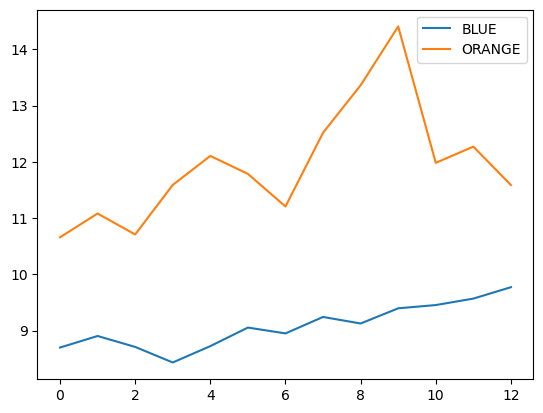

In [29]:
prices.plot()

<Axes: >

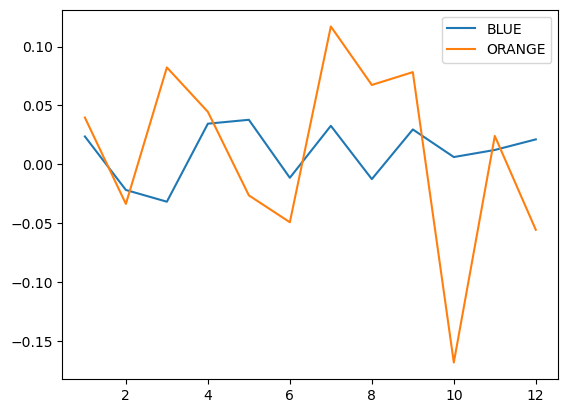

In [30]:
returns.plot()

In [31]:
%matplotlib inline

# W1,S1,LAB 2 Risk Adjusted Returns

In [32]:
import pandas as pd

In [33]:
prices=pd.read_csv("data/sample_prices.csv")

In [34]:
prices.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


In [35]:
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [36]:
#now we will convert prices into returns by simply coding pct change 
returns=prices.pct_change()

In [37]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [38]:
returns=returns.dropna()

In [40]:
returns.head()

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381


In [41]:
#now we will compute the risk(volatility) by coding the "std" method

In [42]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [46]:
#lets actualy compute the same number using the classic procedure and not the python command std
deviations=returns-returns.mean()
squared_deviations=deviations**2
variance=squared_deviations.mean()
import numpy as np
volatility=np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [47]:
# now as you can observe those two numbers dont match and thats because at the fisrt procedure the numerator was "n-1" (sample) where us here in the last procedure we used "n" (population)
#now we will play with some new things okey?
# at fisrt how can we know the number of obseravtions
#the comand returns.shape gives us the width and the depth of the dataframe that we have created
returns.shape

(12, 2)

In [51]:
number_of_obs=returns.shape[0]
variance=squared_deviations.sum()/(number_of_obs-1)
volatility=variance**0.5
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [53]:
#if we want to annualize the volatility 
#remember that the way in we annualize the volatiliti si by scaling it or multyplying it by the sqr rute  of the number of periods in a year
#so if you have monthly data you will use 12
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [57]:
#now we will use some real data instead of the sample
returns=pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0,index_col=0, na_values=-99.99)

In [58]:
returns

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [61]:
#if i want to see some specific elements of the table i can apply the following procedure
columns=['Lo 10', 'Hi 10']
returns=returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [62]:
returns=returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [63]:
returns.columns=['SmallCap', "LargeCap"]
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<Axes: >

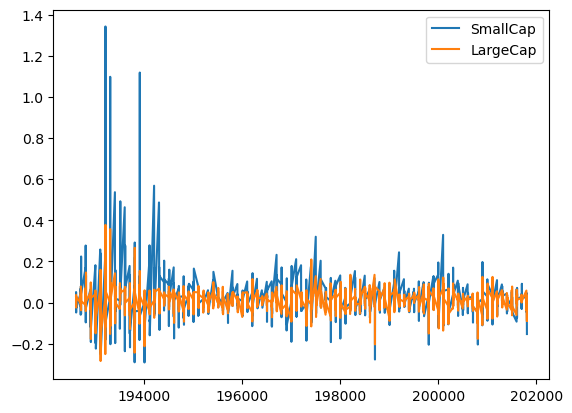

In [64]:
returns.plot.line()

In [65]:
%matplotlib inline

In [66]:
#we sometimes use the command right above when the plot command does not working properly

In [67]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [68]:
annualized_vol=returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [72]:
n_months=returns.shape[0] #with .shape we have the 1110 rwos that we can see at the bottom of a table
return_per_month=(returns+1).prod()**(1/n_months)-1 #with .prod we calculate the product(το πλήθος) from an arayys elements
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [75]:
annualized_return=(return_per_month+1)**12-1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [76]:
# but we can do all the above about annualizing the returns with just one step
annualized_return=(returns+1).prod()**(12/n_months)-1

In [77]:
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [78]:
# Now we will measure Return on Risk ratio
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [81]:
#now we will compute the Sharpe ratio: instead of just looking at the annualized return/annualized volatility ratio it gives you the excess return over the risk free rate
#so we must start by defining the risk free rate
rf_rate=0.03 #(3%)
excess_return=(annualized_return-rf_rate)
sharpe_ratio=excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

# W1,S1, Lab 3 DrawDown

<Axes: >

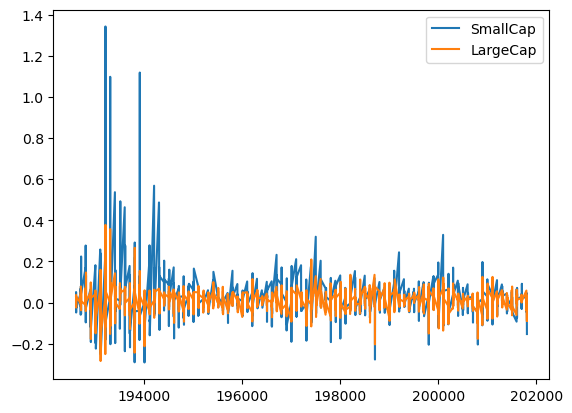

In [85]:
# we first need to import the data
import pandas as pd
me_m=pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv"
                ,header=0, index_col=0,na_values=-99.99)
rets=me_m[['Lo 10','Hi 10']]
rets.columns=['SmallCap','LargeCap']
rets=rets/100
rets.plot.line()

In [96]:
rets.index=pd.to_datetime(rets.index, format='%Y%m')

<Axes: >

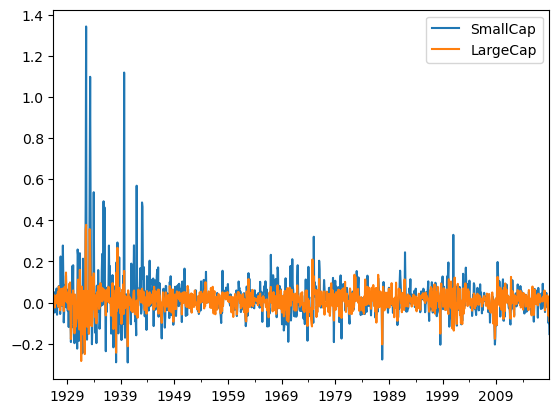

In [97]:
rets.plot.line()

In [101]:
rets.index=rets.index.to_period('M')
rets.head()

AttributeError: 'PeriodIndex' object has no attribute 'to_period'

In [99]:
rets.plot.line

<bound method PlotAccessor.line of <pandas.plotting._core.PlotAccessor object at 0x000001656B72DED0>>

In [102]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

<Axes: >

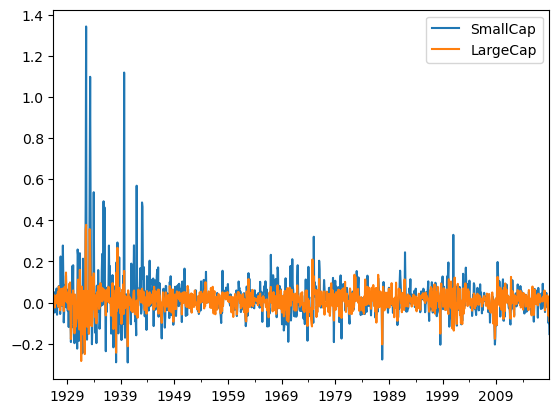

In [104]:
rets.plot.line()

In [105]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [108]:
# now lets compute the drawdowns
# we have three steps for computing the drawdowns

# Step1= Compute a wealth Index
# Step2= Compute privious peaks
# Step3= Compute drawdown- which is the wealth index value as a percentage of the previous peak

#Step1_computing the Wealth Index (The value of the portfolio as it compounds over time)
#lets say i have a 1000$ and now I will compute the growth of a dolar over time
wealth_index=1000*(1+rets["LargeCap"]).cumprod()

In [109]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<Axes: >

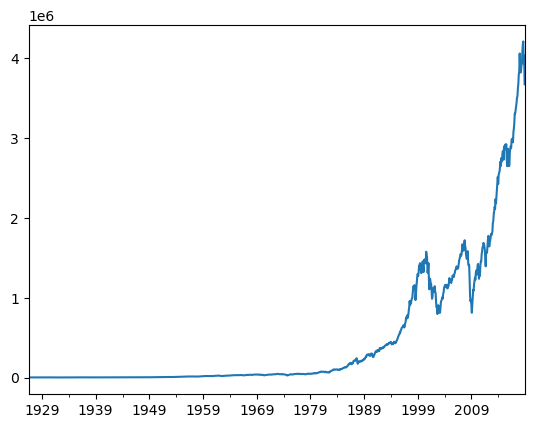

In [110]:
wealth_index.plot.line()

<Axes: >

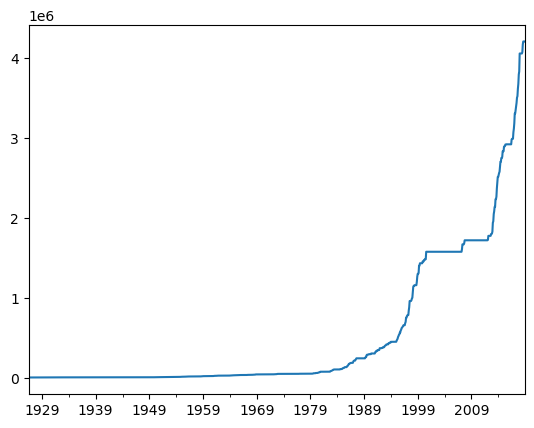

In [114]:
#Computing previous peaks
previous_peaks=wealth_index.cummax()
previous_peaks.plot()

<Axes: >

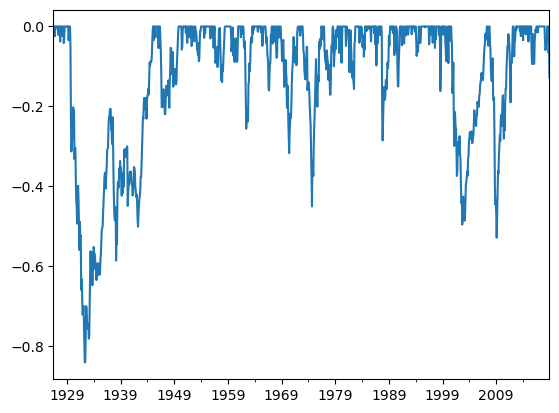

In [116]:
drawdown=(wealth_index-previous_peaks)/previous_peaks
drawdown.plot()

In [117]:
drawdown.min()

-0.8400375277943123

In [118]:
drawdown["1975":].min()

-0.5280945042309304

In [119]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [1]:
import pandas as pd
